In [15]:
import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [16]:
# Path settings

path_var = 1 

if (path_var == 1):
    filepath = '/home/docboy/Desktop/Option_Pricing/datasets/'

else:
    filepath = '/home/sharan/Desktop/Option_Pricing/datasets/'

In [17]:
data = pd.read_csv(filepath + 'SBIN_feature_set_COV_STEP_2.csv')

# data = pd.read_csv(filepath + 'NIFTY50_feature_set_COV_STEP_2.csv')

In [18]:
len(data)

6205

In [19]:
data=data.loc[data['ttm']>3,:]
data=data.loc[data['ttm']<=45,:]
bound=np.percentile(data['percentage'],100)
data=data.loc[data['percentage']<bound]

In [20]:
maxVal=5
minVal=0

In [21]:
print("MinVal:{}".format(minVal))
print("MaxVal:{}".format(maxVal))

MinVal:0
MaxVal:5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2b6523390>]],
      dtype=object)

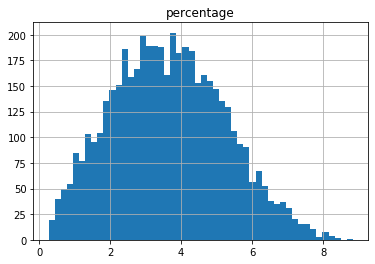

In [22]:
data.hist(column='percentage',bins=50)

In [23]:
print(len(data))

4819


In [24]:
bins=50

step=(maxVal-minVal)/bins
print(step)

0.1


In [25]:
# print(step)
thresh=[]
for i in range(0,bins):
    val=(minVal+(i*step))
    thresh.append(val)
    
print(thresh)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9]


In [26]:
Target=[-1] * len(data)
data['Target']=Target

for i in range(len(thresh)-1,-1,-1):
    data.loc[np.logical_and(data['percentage']>=thresh[i],data['Target']==-1),'Target']=i
    print("Class {}:".format(i))
    print(len(data.loc[data['Target']==i]))
#     print(len(data.loc[data['Target']==i])/len(data)*100)

data = data.dropna()

Class 49:
1088
Class 48:
89
Class 47:
98
Class 46:
86
Class 45:
87
Class 44:
103
Class 43:
100
Class 42:
108
Class 41:
103
Class 40:
115
Class 39:
95
Class 38:
117
Class 37:
129
Class 36:
91
Class 35:
111
Class 34:
98
Class 33:
118
Class 32:
104
Class 31:
118
Class 30:
110
Class 29:
109
Class 28:
114
Class 27:
98
Class 26:
74
Class 25:
111
Class 24:
106
Class 23:
105
Class 22:
82
Class 21:
92
Class 20:
87
Class 19:
62
Class 18:
91
Class 17:
63
Class 16:
54
Class 15:
61
Class 14:
62
Class 13:
54
Class 12:
44
Class 11:
46
Class 10:
58
Class 9:
30
Class 8:
36
Class 7:
30
Class 6:
25
Class 5:
29
Class 4:
15
Class 3:
8
Class 2:
5
Class 1:
0
Class 0:
0


In [27]:
data.to_csv(filepath + 'SBIN_feature_set_COV_complete.csv', index =  False)


# data.to_csv(filepath + 'NIFTY50_feature_set_COV_complete.csv', index =  False)